# Multiclass Classification using Random Forest on Scikit-Learn Library
### Introduction

- We collected 
We are going to use the collected data when manipulating the square, the rectangle,the hexagon and the circle and use the positions to classify.

In [1]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Data preprocessing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# To measure performance
from sklearn import metrics

## Dataset

In [2]:
# SQUARE
with open('../Control/data_pos_trial.json') as f:
    full_data_dict_square = json.load(f)
# HEXAGON
with open('../Control/data_pos_trial_hexagon.json') as f:
    full_data_dict_hexagon = json.load(f)
# CIRCLE
with open('../Control/data_pos_trial_circle.json') as f:
    full_data_dict_circle = json.load(f)
# RECTANGLE
with open('../Control/data_pos_trial_rectangle.json') as f:
    full_data_dict_rectangle = json.load(f)

number_trials = len(full_data_dict_square) + len(full_data_dict_rectangle) 
number_trials += len(full_data_dict_circle) + len(full_data_dict_hexagon) 
data_array  = np.empty((0,142), int) # 5 --> LF1_2;TIME_12;CLASS
data_class = []

poses = [60,65,70]
gaps = [34,42,50]
dims = [20,25,30]
trials = [1,2]
data_list=[]

# class --> 0:square 1:hexagon 2:circle 3:rectangle
# square and hexagon same trials
for trial in trials:
    for gap in gaps:
        for dim in dims:
            for pose in poses:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+"_"+str(trial)
                data_dict_square = full_data_dict_square[dict_key]
                data_trial = np.append(np.array(data_dict_square['RF_motion1'][0]),
                                       np.array(data_dict_square['LF_motion2'][0]))[:142]
                data_trial = data_trial[np.newaxis,:]
                data_class += [0]
                data_array = np.append(data_array, data_trial, axis = 0)
                data_dict_hexagon = full_data_dict_hexagon[dict_key]
                data_trial = np.append(np.array(data_dict_hexagon['RF_motion1'][0]),
                                       np.array(data_dict_hexagon['LF_motion2'][0]))[:142]
                data_trial = data_trial[np.newaxis,:]
                data_class += [1]
                data_array = np.append(data_array, data_trial,axis = 0)
# for circle the dim 20 gaps 50 only have the 70 pose
dims_circle = [20,25]
for trial in trials:
    for gap in gaps:
        for dim in dims_circle:
            for pose in poses:
                if not ((dim == 20 and gap == 50 and pose == 60) or 
                    (dim == 20 and gap == 50 and pose == 65)):
                    dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+"_"+str(trial)
                    data_dict_circle = full_data_dict_circle[dict_key]
                    data_trial = np.append(np.array(data_dict_circle['RF_motion1'][0]),
                                           np.array(data_dict_circle['LF_motion2'][0]))[:142]
                    data_trial = data_trial[np.newaxis, :]
                    data_class += [2]
                    data_array = np.append(data_array, data_trial,axis = 0)
# for rectangle there is only one object of dim 20x25
dims_rectangle = [[20,25],[25,20]]
for trial in trials:
    for gap in gaps:
        for dim in dims_rectangle:
            for pose in poses:
                dict_key = "dim_"+str(dim[0])+"_"+str(dim[1])+"_pose_"+str(pose)+"_gap_"+str(gap)+"_"+str(trial)
                data_dict_rectangle = full_data_dict_rectangle[dict_key]
                data_trial = np.append(np.array(data_dict_rectangle['RF_motion1'][0]),
                                       np.array(data_dict_rectangle['LF_motion2'][0]))[:142]
                data_trial = data_trial[np.newaxis, :]
                data_class += [3]
                data_array = np.append(data_array, data_trial,axis = 0)


# Random Forest Classifier
https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [13]:
# Splitting Dataset
y = data_class
X = data_array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 36) #10% of the train data_Set
#To do this with sklearn.train_test_split you can simply not provide a random_state and it will pick one randomly using np.random.

# Number of features 
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(1, 20).astype(int),
    'max_depth': [None] + list(np.linspace(1, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
RSEED = 50
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 1, 1, 1, 2, 2, 2, 3,
                                                      3, 4, 4, 4, 5, 5, 6, 6, 6,
                                                      7, 7, 7, 8, 8, 9, 9, 9,
                                                      10, 10, 11, 11, 11, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                        

In [5]:
rs.best_params_

{'n_estimators': 8,
 'min_samples_split': 10,
 'max_leaf_nodes': 28,
 'max_features': 'auto',
 'max_depth': 9,
 'bootstrap': False}

In [29]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=8,
                               min_samples_split=10,
                               max_leaf_nodes=28,
                               max_features = 'auto',
                               bootstrap = True,
                               max_depth = 9)
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
y_pred = model.predict(X_test)
#print("the prection of the classification is :")
#print(y_test)
#print(y_pred)
# Probabilities for each class
y_probs = model.predict_proba(X_test)
print("the probability for the classification is :")
print(y_probs[:][:5])
"""
from sklearn.metrics import roc_auc_score

# Calculate roc auc with "ovr"
roc_value_ovr = roc_auc_score(y_test, y_probs, multi_class='ovr')
# Calculate roc auc with "ovo"
roc_value_ovo = roc_auc_score(y_test, y_probs, multi_class='ovo')
print(roc_value_ovo)


# Predicting the Test set results
# Making the Confusion Matrix
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, labels=[0,1,2,3]))
"""

the probability for the classification is :
[[0.0263 0.764  0.1905 0.0192]
 [0.     0.     0.     1.    ]
 [0.25   0.2917 0.4333 0.025 ]
 [0.0263 0.889  0.0655 0.0192]
 [0.05   0.     0.     0.95  ]]


'\nfrom sklearn.metrics import roc_auc_score\n\n# Calculate roc auc with "ovr"\nroc_value_ovr = roc_auc_score(y_test, y_probs, multi_class=\'ovr\')\n# Calculate roc auc with "ovo"\nroc_value_ovo = roc_auc_score(y_test, y_probs, multi_class=\'ovo\')\nprint(roc_value_ovo)\n\n\n# Predicting the Test set results\n# Making the Confusion Matrix\n# and the rows will show the actual number of instances for each label.\nprint(metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3]))\n# Printing the precision and recall, among other metrics\nprint(metrics.classification_report(y_test, y_pred, labels=[0,1,2,3]))\n'

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3])

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.tight_layout()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.savefig('shape_confusion_matrix_2.png',bbox_inches='tight')

the accuracy of the classification is:
0.8055555555555556
the prection of the classification is :
[1, 3, 2, 1, 0, 2, 0, 1, 2, 3, 1, 0, 1, 3, 2, 3, 1, 0, 3, 2, 0, 2, 1, 1, 0, 3, 3, 0, 1, 0, 2, 0, 1, 1, 0, 2]
[1 3 2 1 3 2 3 1 1 3 2 0 1 3 2 3 1 0 3 2 0 2 1 1 0 1 3 3 1 0 2 0 1 1 0 1]
cross val
0.8357142857142857
Confusion matrix, without normalization
[[ 6  1  0  3]
 [ 0 10  1  0]
 [ 0  2  6  0]
 [ 0  1  0  6]]


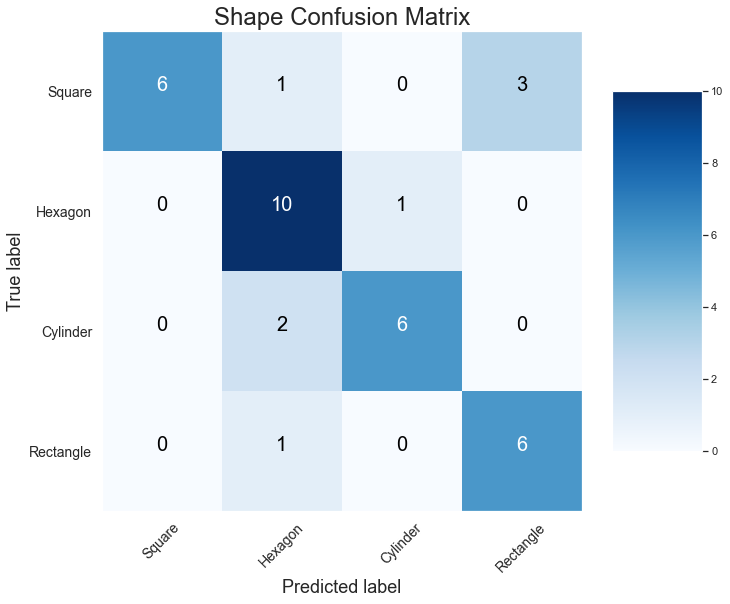

In [35]:
from sklearn.metrics import accuracy_score

print("the accuracy of the classification is:")
print(accuracy_score(y_test,y_pred))
print("the prection of the classification is :")
print(y_test)
print(y_pred)

from sklearn.model_selection import cross_val_score

print("cross val")
print(np.mean(cross_val_score(model,X_train, y_train,cv=10)))


plot_confusion_matrix(cm, classes = ['Square', 'Hexagon', 'Cylinder', 'Rectangle'],
                      title = 'Shape Confusion Matrix')

In [20]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[5]

# Export as dot
export_graphviz(estimator, 'treeFromRandomForest.dot', rounded = True, 
                class_names = ['square', 'hexagon', 'cylinder', 'rectangle'], filled = True)

https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

https://www.educative.io/edpresso/how-to-create-a-confusion-matrix-in-python-using-scikit-learn
